In [1]:
from mlhelper import MLHelper, pd
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()
labels_dict = {
    0: {
        'name': 'malignant',
        'color': 'r',
        'marker': '^'
    },
    1: {
        'name': 'benign',
        'color': 'b',
        'marker': 'o'
    }
}
helper = MLHelper('Breast Cancer', labels_dict)
cancer_df = pd.DataFrame(
    data=dataset.data
    , columns=dataset.feature_names
)
cancer_df['target'] = dataset.target

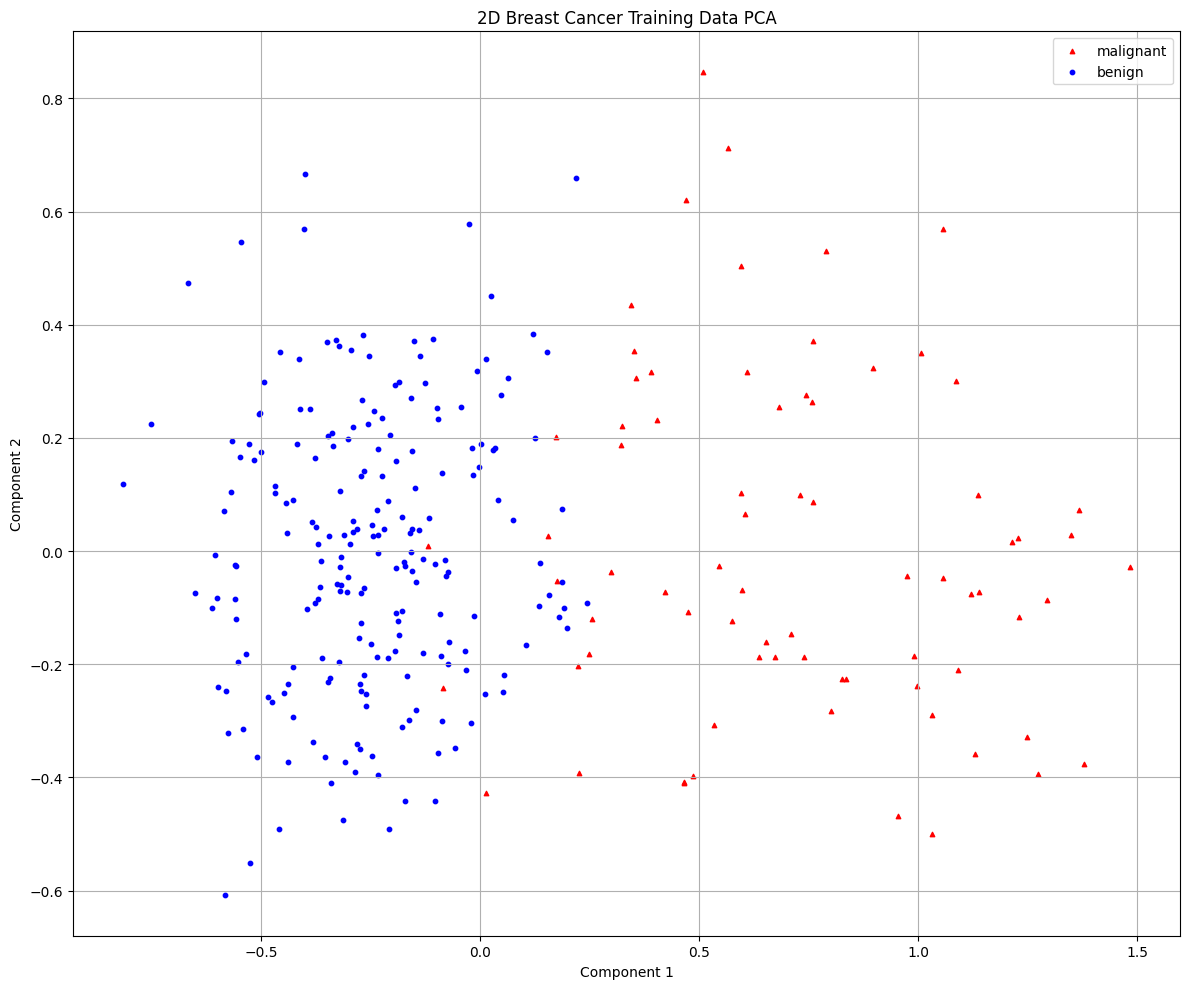

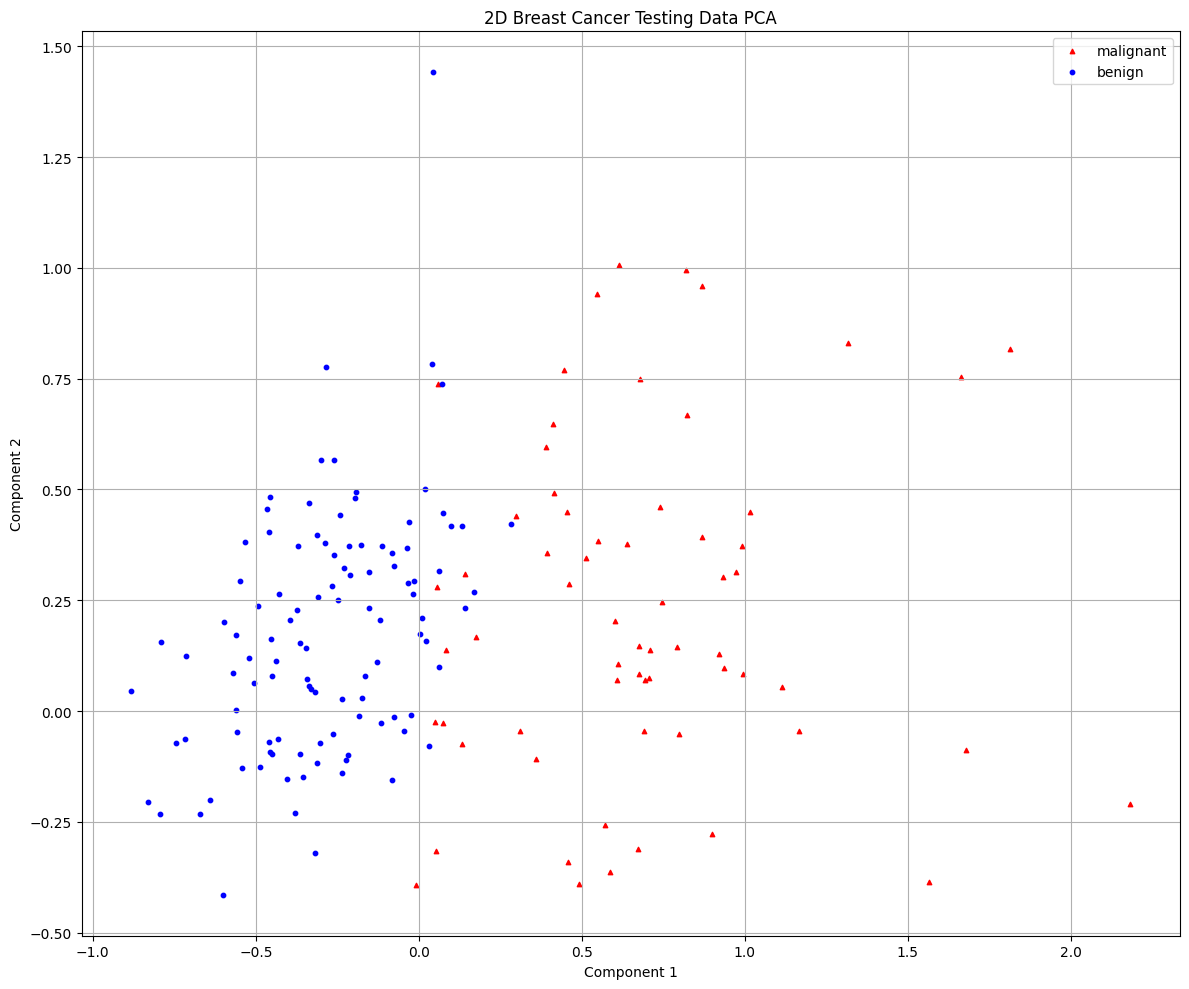

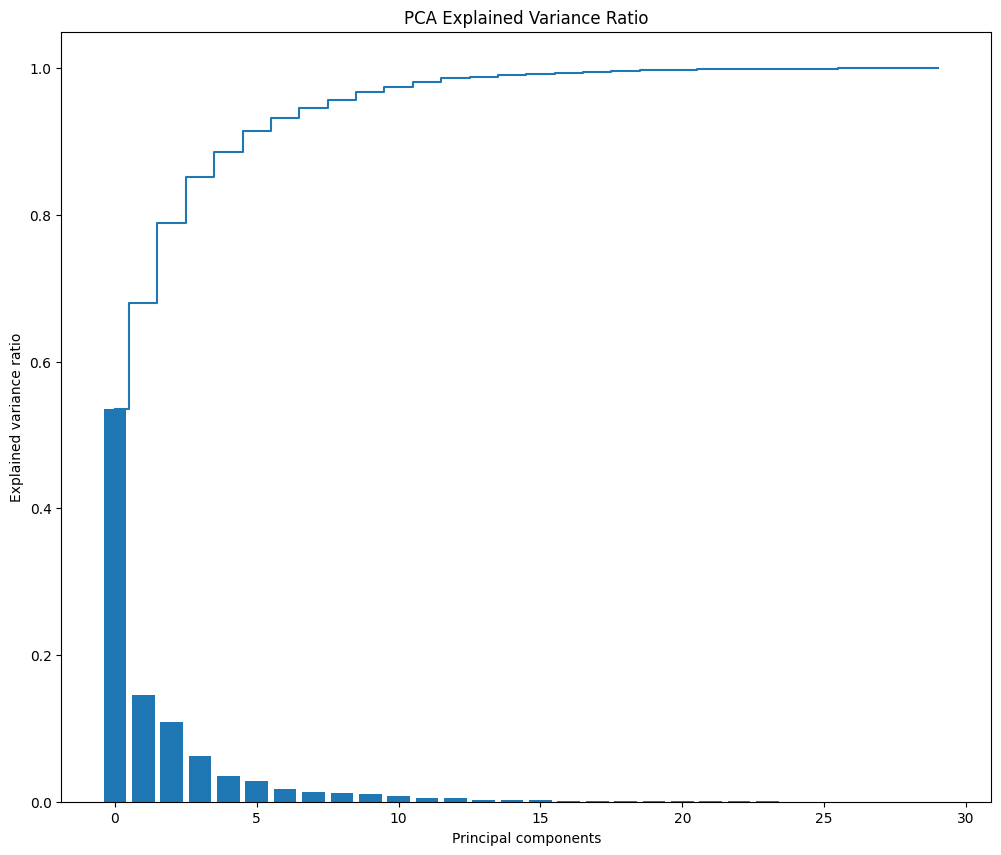

In [2]:
outlier_params = {'eps': 0.5, 'min_samples': 8, 'n_jobs': -1}
X_train, X_test, y_train, y_test = helper.get_split_data(cancer_df, test_size=0.3, shuffle=True, stratify=True)
X_train_transformed = helper.get_transformed_features(X_train)
X_test_transformed = helper.get_transformed_features(X_test)
X_train_scaled, X_test_scaled = helper.get_scaled_data(X_train_transformed, X_test_transformed, y_train, y_test, 'mm')

df_train = X_train_scaled.copy()
df_train['target'] = y_train
df_train_outlier_removed = helper.remove_outliers(df_train, 'dbscan', outlier_params)

X_train_feature_extracted, X_test_feature_extracted = helper.extract_features(df_train_outlier_removed.iloc[:, :-1], X_test_scaled, df_train_outlier_removed.iloc[:, -1], y_test, 'pca', {})

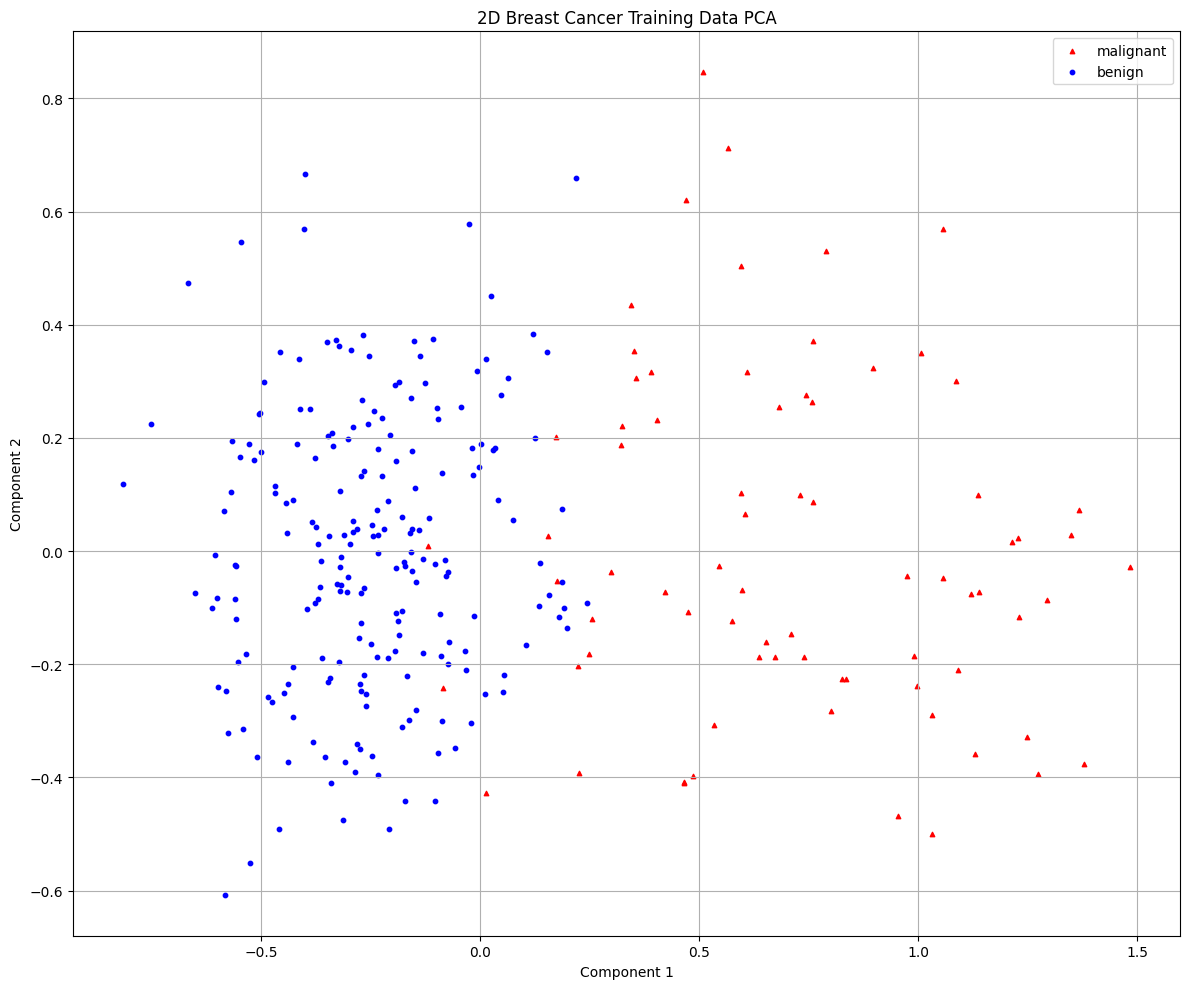

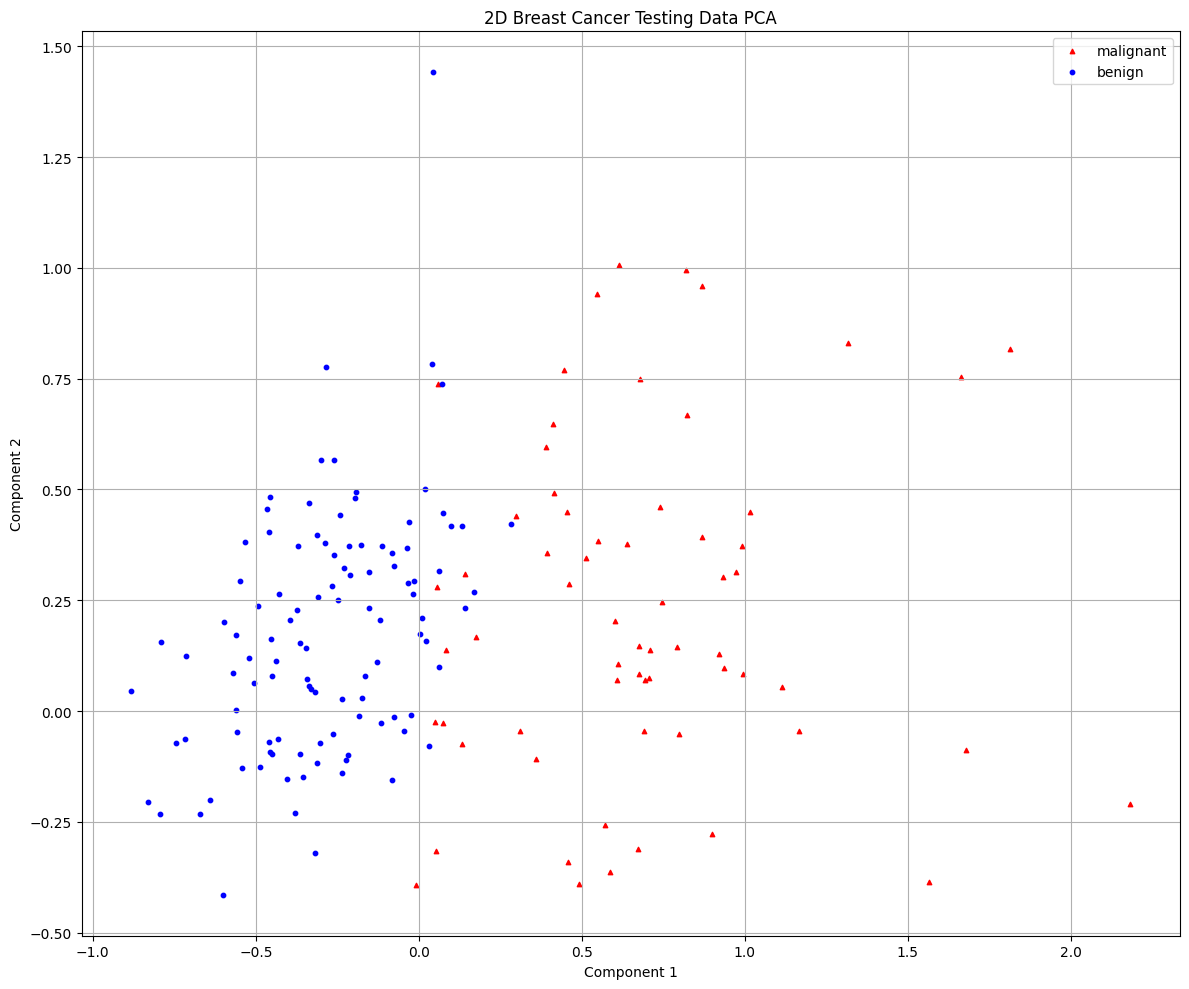

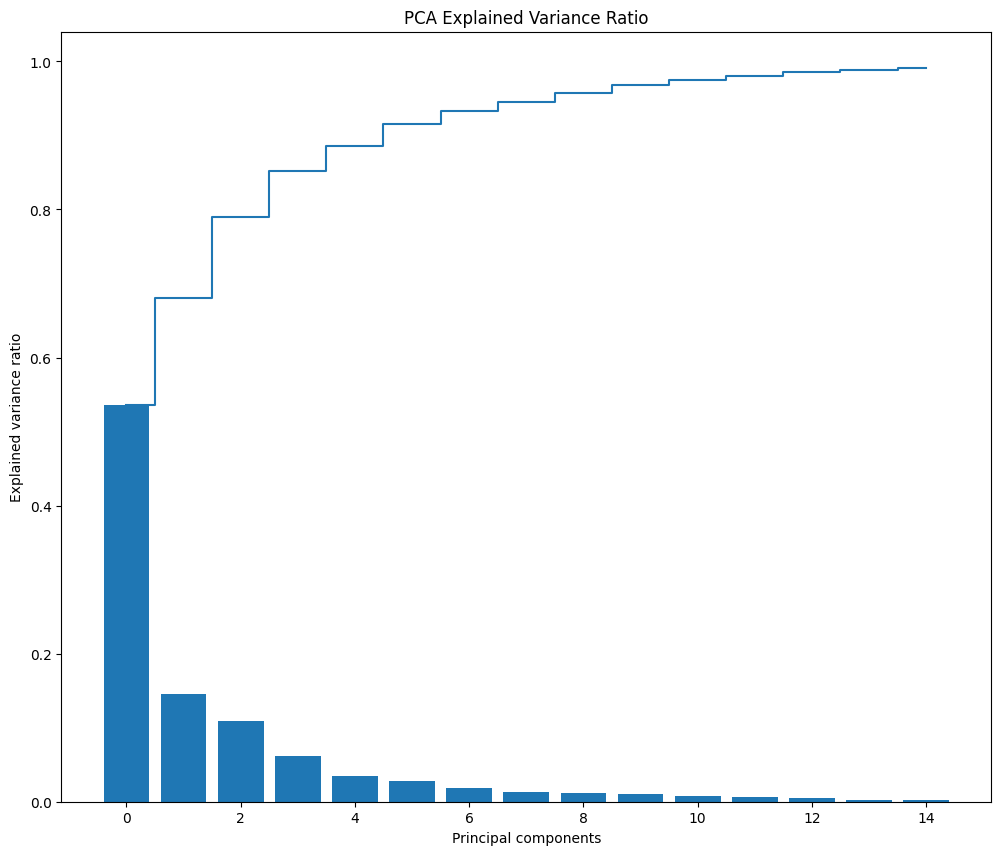

[I 2025-04-27 11:15:15,633] A new study created in memory with name: no-name-3d596583-bc9c-4f84-8f6a-a182bfa69f84
[I 2025-04-27 11:15:15,652] Trial 0 finished with value: 0.7386569872958259 and parameters: {'C': 1.0897536070152305, 'kernel': 'poly', 'gamma': 0.019406427914066618, 'degree': 2, 'max_iter': 894}. Best is trial 0 with value: 0.7386569872958259.
[I 2025-04-27 11:15:15,670] Trial 1 finished with value: 0.7386569872958259 and parameters: {'C': 0.0010674758711999531, 'kernel': 'sigmoid', 'gamma': 0.00023118412313157368, 'max_iter': 2415}. Best is trial 0 with value: 0.7386569872958259.
[I 2025-04-27 11:15:15,691] Trial 2 finished with value: 0.7386569872958259 and parameters: {'C': 4.36714771109729, 'kernel': 'rbf', 'gamma': 0.0010404382462317248, 'max_iter': 652}. Best is trial 0 with value: 0.7386569872958259.
[I 2025-04-27 11:15:15,703] Trial 3 finished with value: 0.9581367211131276 and parameters: {'C': 0.23751406929881336, 'kernel': 'linear', 'max_iter': 6305}. Best is t

Best trial:
Accuracy: 0.9860254083484573
Best hyperparameters:  {'C': 30.705677028583143, 'kernel': 'linear', 'max_iter': 3711}


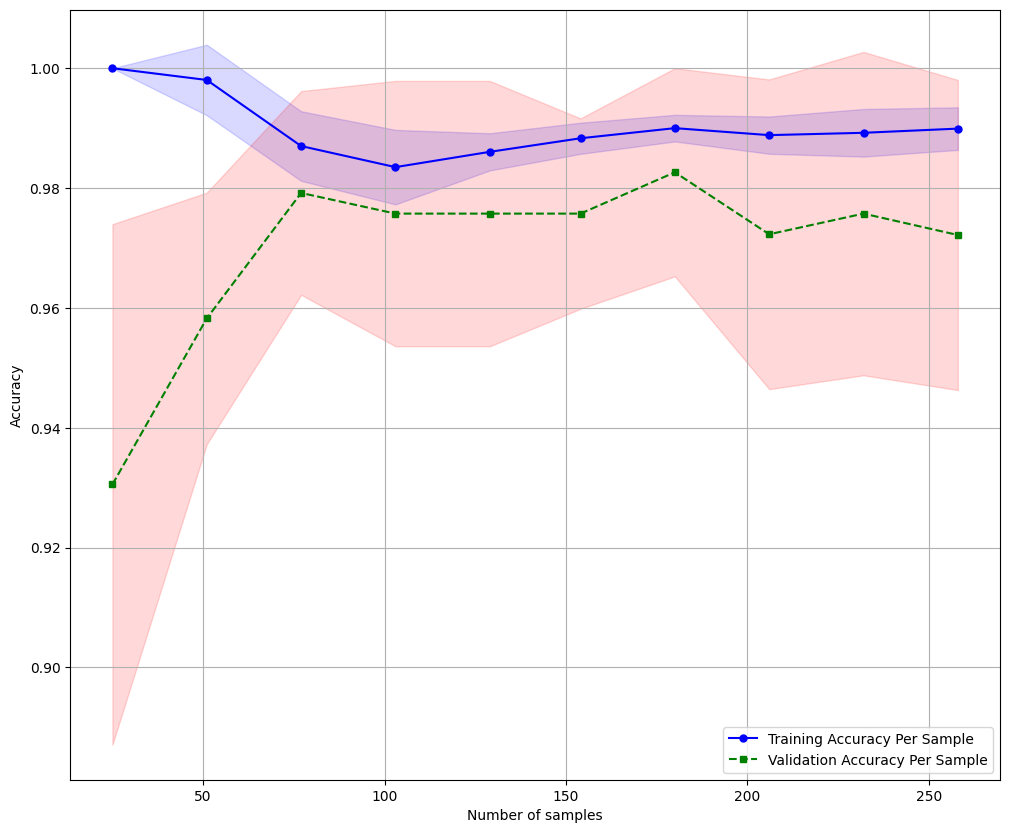

Confusion Matrix
[[ 51  13]
 [  0 107]]
Accuracy: 0.9240, Precision: 0.8917, Recall: 1.0000, F1: 0.9427, AUC: 0.9901


In [4]:
X_train_feature_extracted, X_test_feature_extracted = helper.extract_features(df_train_outlier_removed.iloc[:, :-1], X_test_scaled, df_train_outlier_removed.iloc[:, -1], y_test, 'pca', {'n_components': 15})
helper.train_and_evaluate_model('svc', X_train_feature_extracted, X_test_feature_extracted, df_train_outlier_removed.iloc[:,-1], y_test)